# Model - Bagging Trees

Decision trees in general have low bias and high variance. We can think about it like this: given a training set, we can keep asking questions until we are able to distinguish between ALL examples in the data set. We could keep asking questions until there is only a single example in each leaf. Since this allows us to correctly classify all elements in the training set, the tree is unbiased. However, there are many possible trees that could distinguish between all elements, which means higher variance.

### How do we reduce variance?
In order to reduce the variance of a single error tree, we usually place a restriction on the number of questions asked in a tree. This is true  for single decision trees which we have seen in previous notebooks.

Along with this other method to do reduce variance is to **ensemble models** of decision trees. The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.



### How to ensemble?

1. **Averaging**: Build several estimators independently and then average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced. Examples:
    - Bagging
    - Random Forest
    - Extremely Randomized Trees
 
2. **Boosting**: Build base estimators sequentially and then try to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.
    - AdaBoost
    - Gradient Boosting (e.g. xgboost)


## Bagging Meta Class

![](img/bagging.svg)
Four options for Bagging
- **Pasting**: When random subsets of the dataset are drawn as random subsets of the samples
- **Bagging**: When random subsets of the dataset are drawn as random subsets of the samples, with replacement (Bootstrap Aggregation)
- **Random Subspaces** - When random subsets of the dataset are drawn as random subsets of the features
- **Random Patches** - When base estimators are built on subsets of both samples and features


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("data/historical_loan.csv")

In [15]:
df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [17]:
df.years = df.years.fillna(np.mean(df.years))

In [18]:
#Load the preprocessing module
from sklearn import preprocessing
categorical_variables = df.dtypes[df.dtypes=="object"].index.tolist()
for i in categorical_variables:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df[i]))
    df[i] = lbl.transform(df[i])

In [19]:
data = df.loc[:,('age', 'years', 'income')]
target = df.loc[:,'default']

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [21]:
BaggingClassifier(DecisionTreeClassifier(max_depth=10), max_samples=0.5, bootstrap=False)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [22]:
models_name = ['Decision Tree', 'Patching', 'Bagging' ]

In [23]:
models = [DecisionTreeClassifier(max_depth=10),
         BaggingClassifier(DecisionTreeClassifier(max_depth=10),
                           max_samples=0.5, bootstrap=False),
         BaggingClassifier(DecisionTreeClassifier(max_depth=10), 
                           max_samples=0.5, bootstrap=True)]

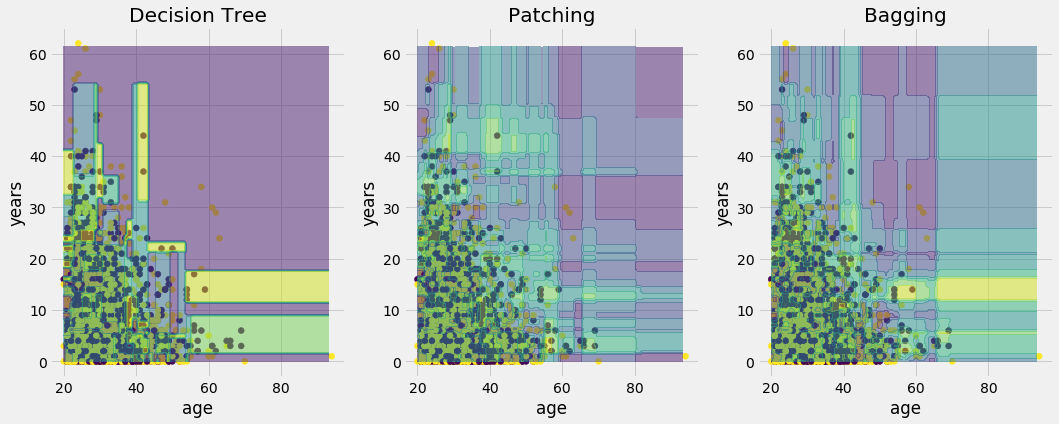

In [25]:
plt.figure(figsize=(16, 6))
for idx, pair in enumerate([[0, 1], [0, 2], [1, 2]]):
    X = data.iloc[:, 0:2]
    y = target
    
    plt.subplot(1, 3, idx + 1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap = plt.cm.viridis)

    # Classify the points
    clf = models[idx].fit(X, y)
    x_min, x_max = X.iloc[:, 0].min(), X.iloc[:, 0].max()
    y_min, y_max = X.iloc[:, 1].min(), X.iloc[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min)/100),
                         np.arange(y_min, y_max, (y_max - y_min)/100))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
    Z = Z.reshape(xx.shape)

    # plot the mesh                     
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha = 0.5)
    plt.title(models_name[idx])
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.axis("tight")

## Exercise 1
Does the classification change by changing max_depth?

## Exercise 2
Change the algorithm within the Bagging Classifier?